### Feature Engineering

Outliers:
* 523, 1298 are maybe outliers because they have lot of connected streets

Categorical Variables:
* Alley: NaN => No Access

Ordinal Variables:
* Carefull with KitchenQual for example

Possible Features improvements:
* YearRemodAdd is the same as YearBuilt if there was no remodelling - maybe we can drop YearBuilt!

In [1]:
import pandas as pd
train_df = pd.read_csv('data/train.csv')

In [2]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### MSSubClass - MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.

In [5]:
train_df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [9]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

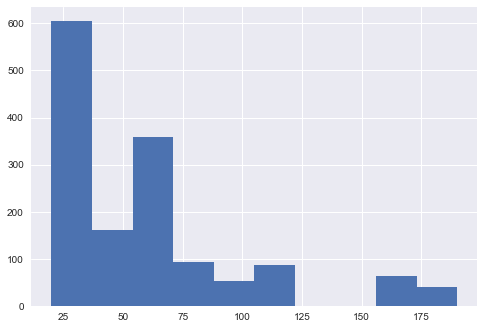

In [13]:
train_df['MSSubClass'].hist()
plt.show()

In [11]:
train_df['MSSubClass'].isnull().any()

False

#### MSZoning- MS Zoning (Nominal): Identifies the general zoning classification of the sale.

In [15]:
train_df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [17]:
train_df['MSZoning'].isnull().any()

False

In [21]:
zonings = train_df['MSZoning'].astype('category')

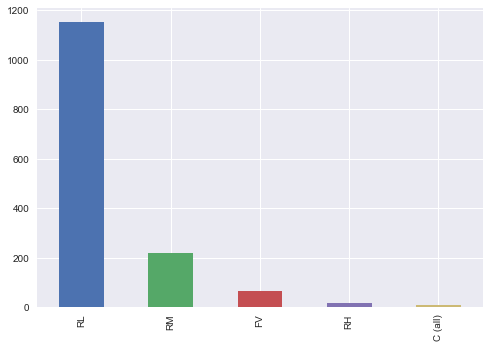

In [40]:
zonings.value_counts().plot(kind='bar')
plt.show()

#### LotFrontage- Lot Frontage (Continuous): Linear feet of street connected to property

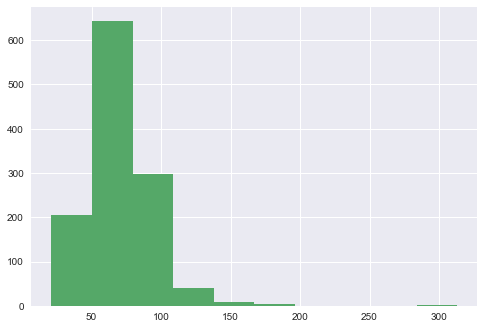

In [43]:
train_df['LotFrontage'].hist()
plt.show()

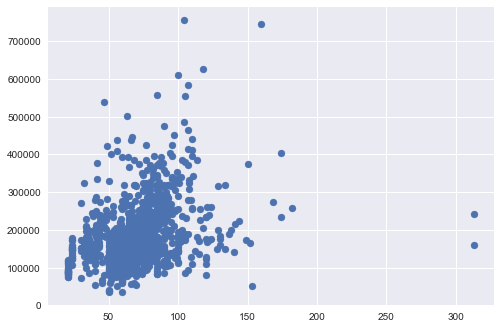

In [46]:
plt.scatter(train_df['LotFrontage'],train_df['SalePrice']) 
plt.show()

In [48]:
train_df[train_df['LotFrontage'] > 300]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Same outliers in lot frontage, meaning that maybe the prices are so small because of the connected streets.

#### LotArea - Lot Area (Continuous): Lot size in square feet

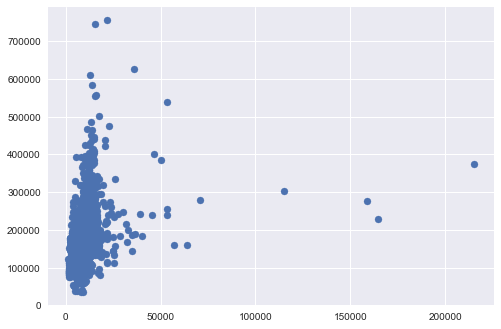

In [49]:
plt.scatter(train_df['LotArea'],train_df['SalePrice']) 
plt.show()

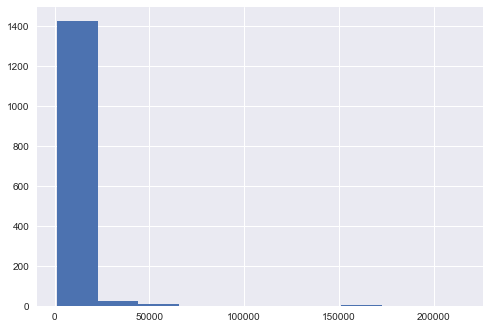

In [50]:
train_df['LotArea'].hist()
plt.show()

#### Street - Street (Nominal): Type of road access to property

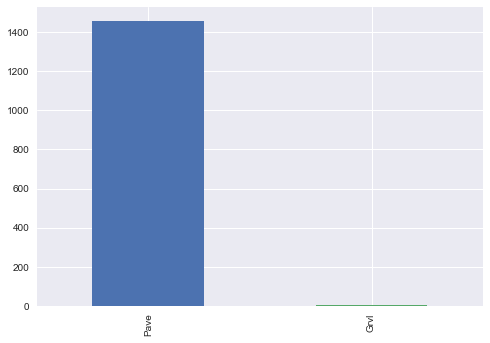

In [51]:
train_df['Street'].value_counts().plot(kind='bar')
plt.show()

In [65]:
train_df['Street'].isnull().any()

False

#### Alley (Nominal): Type of alley access to property

In [67]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

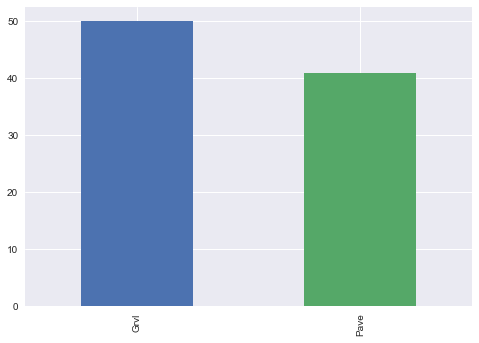

In [68]:
train_df['Alley'].value_counts().plot(kind='bar')
plt.show()

In [71]:
train_df['Alley'].isnull().sum() / len(train_df)

0.93767123287671228

#### LotShape - Lot Shape (Ordinal): General shape of property

In [75]:
train_df['LotShape'].isnull().sum()

0

In [76]:
train_df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [96]:
train_df.groupby('LotShape')['SalePrice'].mean()

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64

In [101]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


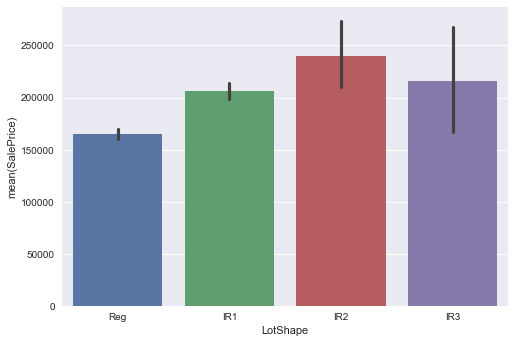

In [105]:
sns.barplot(train_df['LotShape'], train_df['SalePrice'])
plt.show()

#### Land Contour (Nominal): Flatness of the property

In [106]:
train_df['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


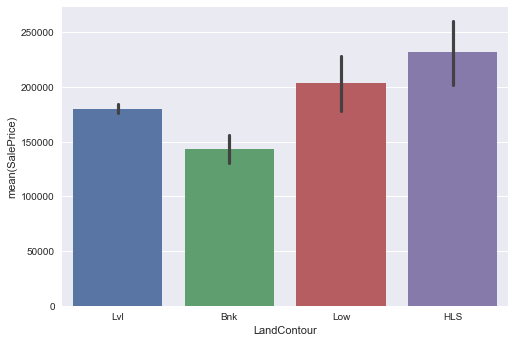

In [107]:
sns.barplot(train_df['LandContour'], train_df['SalePrice'])
plt.show()

#### Utilities (Ordinal): Type of utilities available

In [108]:
train_df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


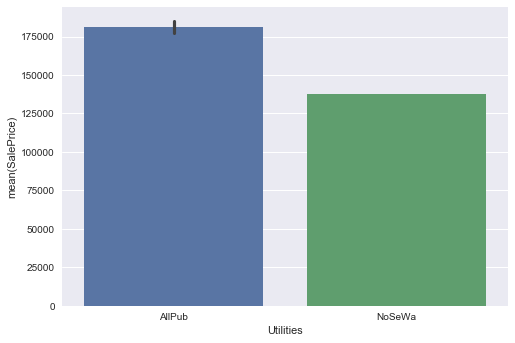

In [109]:
sns.barplot(train_df['Utilities'], train_df['SalePrice'])
plt.show()

#### Lot Config (Nominal): Lot configuration

In [111]:
train_df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


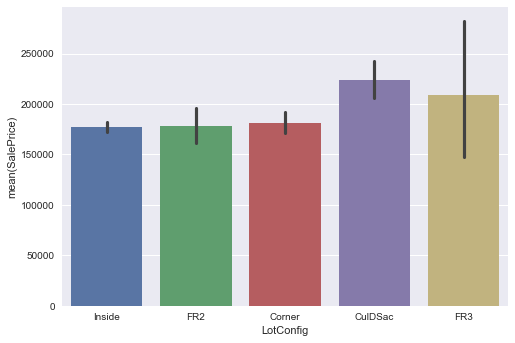

In [113]:
sns.barplot(train_df['LotConfig'], train_df['SalePrice'])
plt.show()

#### Land Slope (Ordinal): Slope of property

In [120]:
def show_categorical(feature):
    print(train_df[feature].unique())
    sns.barplot(train_df[feature], train_df['SalePrice'])
    plt.show()
    print('Has null: %s' % train_df[feature].isnull().any())

['Gtl' 'Mod' 'Sev']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


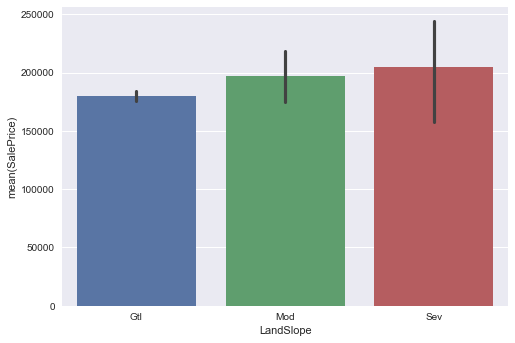

In [115]:
show_categorical('LandSlope')

#### Neighborhood (Nominal): Physical locations within Ames city limits (map available)

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


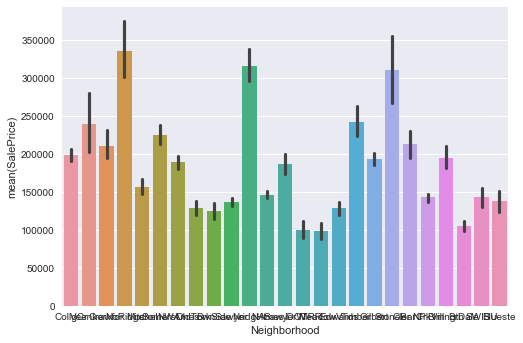

Has null: False


In [121]:
show_categorical('Neighborhood')

#### Condition 1 (Nominal): Proximity to various conditions

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


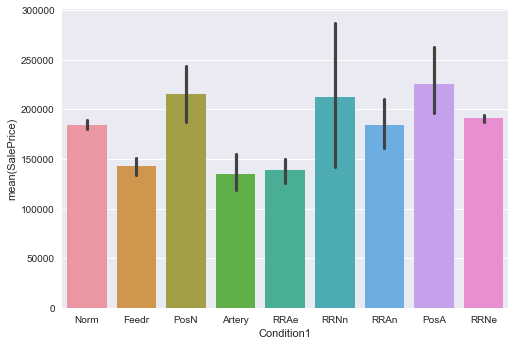

Has null: False


In [123]:
show_categorical('Condition1')

#### Condition 2 (Nominal): Proximity to various conditions (if more than one is present)

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


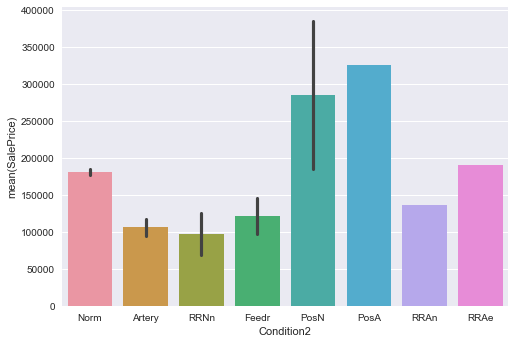

Has null: False


In [125]:
show_categorical('Condition2')

In [139]:
#### Bldg Type (Nominal): Type of dwelling

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


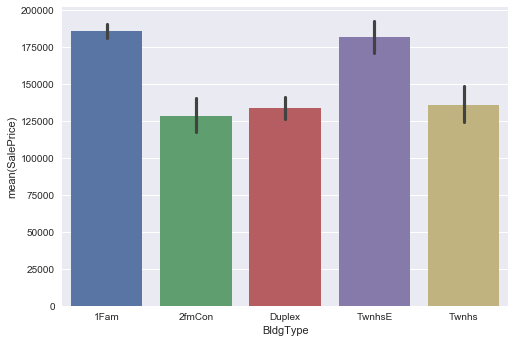

Has null: False


In [140]:
show_categorical('BldgType')

In [141]:
#### House Style (Nominal): Style of dwelling

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


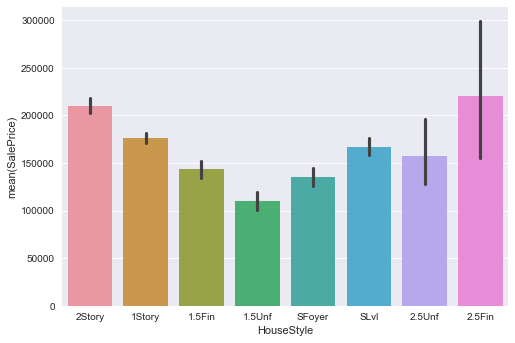

Has null: False


In [142]:
show_categorical('HouseStyle')

#### Overall Qual (Ordinal): Rates the overall material and finish of the house

[ 7  6  8  5  9  4 10  3  1  2]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


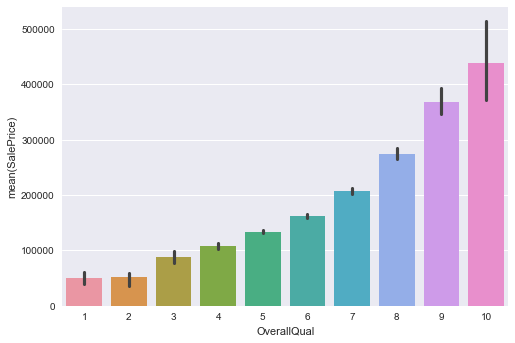

Has null: False


In [145]:
show_categorical('OverallQual')

#### Overall Cond (Ordinal): Rates the overall condition of the house

[5 8 6 7 4 2 3 9 1]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


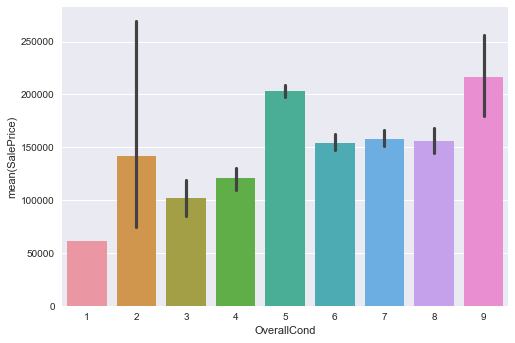

Has null: False


In [148]:
show_categorical('OverallCond')

#### Year Built (Discrete): Original construction date

In [159]:
def show_discrete(feature):
    train_df[feature].unique()
    plt.scatter(train_df[feature], train_df['SalePrice'], alpha=.6)
    plt.show()
    print('Has null: %s' % train_df[feature].isnull().any())

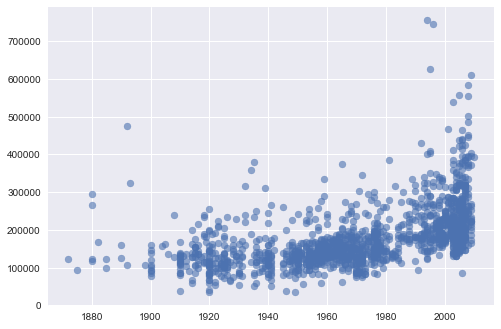

Has null: False


In [160]:
show_discrete('YearBuilt')

#### Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions)

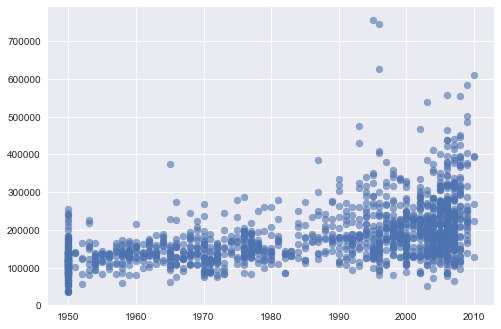

Has null: False


In [163]:
show_discrete('YearRemodAdd')